In [587]:
from batteryCell import Cell
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.linalg import cholesky, inv, sqrtm, block_diag
from scipy import stats
import seaborn as sns

In [588]:
Nx=1
Nxa=3
Ny=1
h=np.sqrt(3)
inv_2h2 = 1 / (2 * h**2)
Wmx=np.array([0])
Wmx=np.append(Wmx,[inv_2h2]*(2*Nxa))
rtWmx=np.sqrt(Wmx)

In [589]:
SigmaW=.1
SigmaV=.1
maxIter=4000
xtrue=2+np.random.normal(0,1)
xhat=0
# print(xhat)
Sigmax=1
dt=1

In [590]:
xstore=np.zeros(maxIter+1)
xstore[0]=xtrue
xhatstore=np.zeros(maxIter+1)
xhatstore[0]=xhat
Sigmaxstore=np.zeros(maxIter+1)
Sigmaxstore[0]=Sigmax
# print(xhat)
# print(np.array([xhat]))

In [591]:
# print(xhat)
for k in range(maxIter):
    # print(k)
    # print(xhat)
    xhata=np.array(xhat)
    # print(xhata)
    xhata=np.append(xhata,[0,0]).reshape(-1,1)
    # print(xhata)
    Sigmaxa=block_diag(Sigmax,SigmaW,SigmaV)
    # print(Sigmaxa)
    #cholesky decomposition with lower triangular matrix
    try:
        sSigmaxa = cholesky(Sigmaxa, lower=True)
    except np.linalg.LinAlgError:
        sSigmaxa = np.eye(Sigmaxa.shape[0]) * 1e-6  # fallback
    # print(sSigmaxa)
    #calculate sigma points
    X=np.zeros((Nxa,2*Nxa+1))
    X[:,0]=xhata[:,0]
    for i in range(Nxa):
        X[:,i+1]=xhata[:,0]+h*sSigmaxa[:,i]
        X[:,i+1+Nxa]=xhata[:,0]-h*sSigmaxa[:,i]
    Xx=np.sqrt(5+X[0,:])+X[1,:]
    result=np.sum(Wmx*Xx)
    # print(result)
    xhat=result
    Xs=(Xx-xhat)*rtWmx
    Sigmax=np.sum(Xs**2)
    # print(result1)
    w=np.random.normal(0,math.sqrt(SigmaW))
    v=np.random.normal(0,math.sqrt(SigmaV))
    ytrue=xtrue**3+v
    xtrue=math.sqrt(5+xtrue)+w
    
    Y=[Xx[i]**3+X[2,i] for i in range(len(Xx))]
    # print(Y)
    result2=np.sum(Wmx*Y)
    yhat=result2
    # print(yhat)
    Ys=np.array([((Y[i]-yhat)*rtWmx[i]) for i in range(len(Y))])
    result2=np.sum([Ys[i]**2 for i in range(len(Ys))])
    SigmaY=result2
    # print(result2)
    # print(len(Xs),len(Ys))
    SigmaXY=np.sum(Xs*Ys)
    # print(SigmaXY)
    K=SigmaXY/SigmaY
    # print(K)
    xhat=xhat+K*(ytrue-yhat)
    Sigmax=Sigmax-K*SigmaY*K
    xstore[k+1]=xtrue
    xhatstore[k+1]=xhat
    Sigmaxstore[k+1]=Sigmax


Residual Mean: 0.00055825224121091
Residual Std Dev: 0.4111832788163355
Residual Skewness: -0.1776913775829054
Residual Kurtosis: 0.0947456188561393
mean xstore: 2.7800338716948545
mean xhatstore: 2.7794756194536436
mean Sigmaxstore: 0.0028664210119239


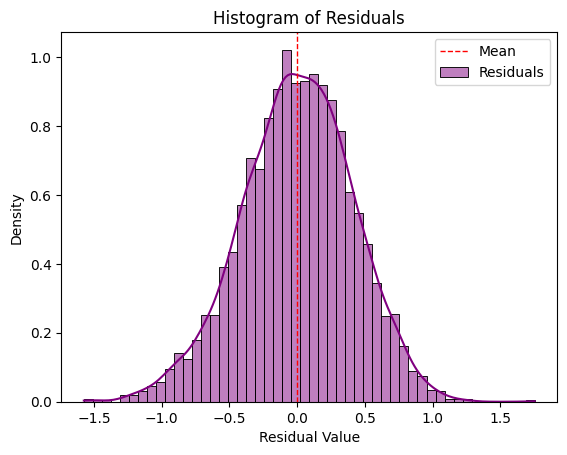

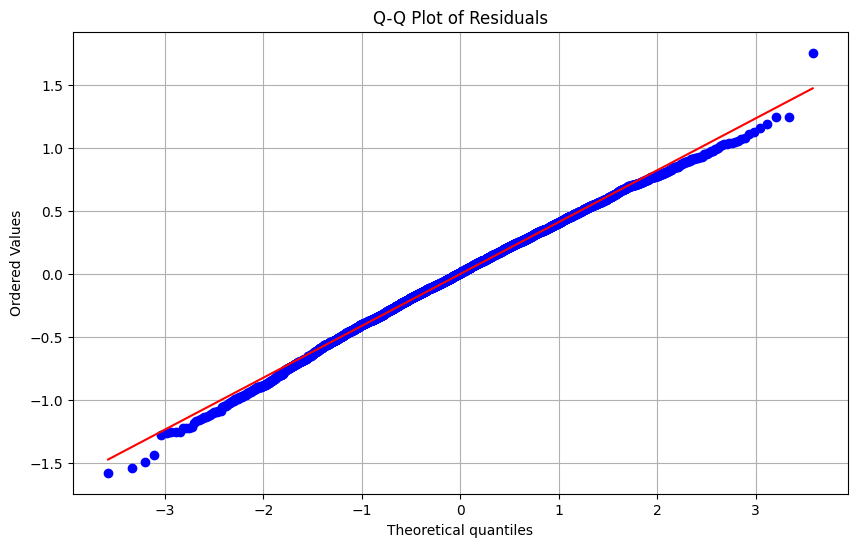

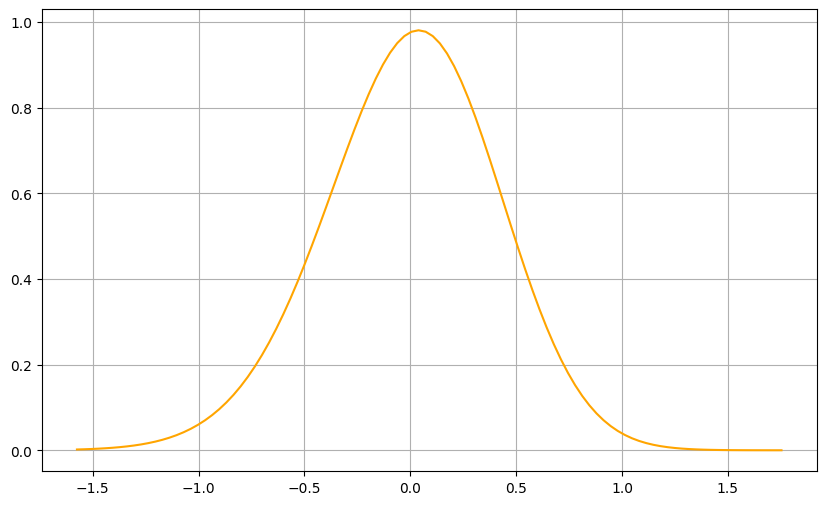

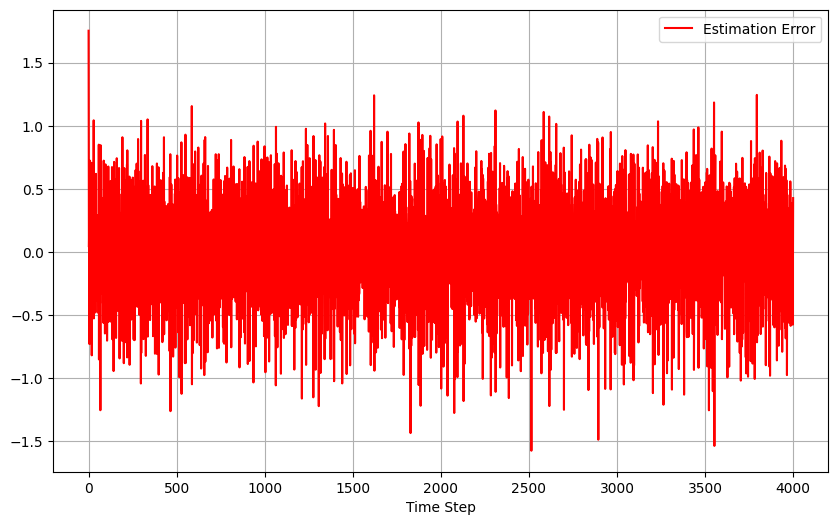

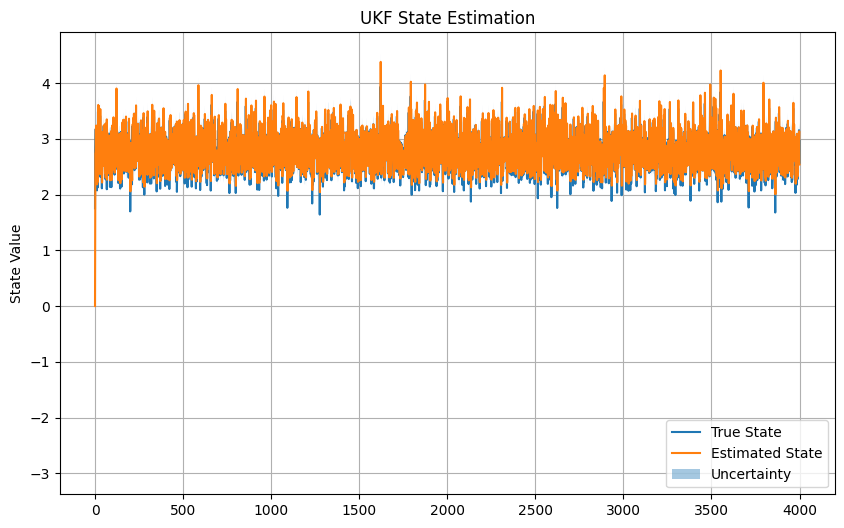

In [592]:

xresidual=xstore-xhatstore
resmean=np.mean(xresidual)
resstd=np.std(xresidual)
resskew=stats.skew(xresidual)
reskurt=stats.kurtosis(xresidual)
meanxstore=np.mean(xstore)
meanxhatstore=np.mean(xhatstore)
meanSigmaxstore=np.mean(Sigmaxstore)
print('Residual Mean:', resmean)
print('Residual Std Dev:', resstd)
print('Residual Skewness:', resskew)
print('Residual Kurtosis:', reskurt)
print(f"mean xstore: {meanxstore}")
print(f"mean xhatstore: {meanxhatstore}")
print(f"mean Sigmaxstore: {meanSigmaxstore}")

plt.figure()
sns.histplot(xresidual,kde=True, stat="density",bins=50,color='purple', edgecolor='black', label='Residuals')
plt.axvline(resmean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.legend()

plt.figure(figsize=(10,6))
stats.probplot(xresidual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
params = stats.skewnorm.fit(xresidual)
x = np.linspace(min(xresidual), max(xresidual), 100)
pdf = stats.skewnorm.pdf(x, *params)
plt.plot(x, pdf, label="Fitted Skew-Normal", color='orange')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(xresidual,label='Estimation Error',color='red')
plt.xlabel('Time Step')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(xstore,label='True State')
plt.plot(xhatstore,label='Estimated State')
plt.fill_between(np.arange(len(Sigmaxstore)),xhatstore-3*np.sqrt(Sigmaxstore),xhatstore+3*np.sqrt(Sigmaxstore),alpha=0.4,label='Uncertainty')
plt.ylabel('State Value')
plt.title('UKF State Estimation')
plt.legend()
plt.grid()
plt.show()
